<a href="https://colab.research.google.com/github/maitri-vv/Fake-Multimedia-Detection/blob/main/Fake_Multimedia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving fake_or_real_news.csv to fake_or_real_news.csv


In [ ]:
pip install pandas nltk

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [ ]:
df=pd.read_csv('fake_or_real_news.csv')

<ipython-input-20-9c962fdbcf43>:1: DtypeWarning: Columns (24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('fake_or_real_news.csv')


In [ ]:
df.head()

,id,title,text,label,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna(axis=1, how='all')

In [ ]:
df.head()

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Function to clean text
def clean_text(text):
   text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
   text = re.sub(r'[^a-zA-Z]', ' ', text) # Keep only letters
   text = text.lower() # Convert to lowercase
   return text

# Apply text cleaning
# Convert all non-string values to strings and replace NaN values
df['text'] = df['text'].astype(str).replace('nan', '', regex=True)
df['cleaned_text'] = df['text'].apply(clean_text)

# Function for tokenization
def tokenize_text(text):
   return word_tokenize(text)

# Apply tokenization
df['tokens'] = df['cleaned_text'].apply(tokenize_text)

# Set up stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(tokens):
   return [word for word in tokens if word not in stop_words]

# Apply stop word removal
df['tokens'] = df['tokens'].apply(remove_stopwords)

# Set up lemmatizer
lemmatizer = WordNetLemmatizer()

# Function for lemmatization
def lemmatize_tokens(tokens):
   return [lemmatizer.lemmatize(word) for word in tokens]

# Apply lemmatization
df['tokens'] = df['tokens'].apply(lemmatize_tokens)

# Display the preprocessed DataFrame
print(df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


KeyError: ignored

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


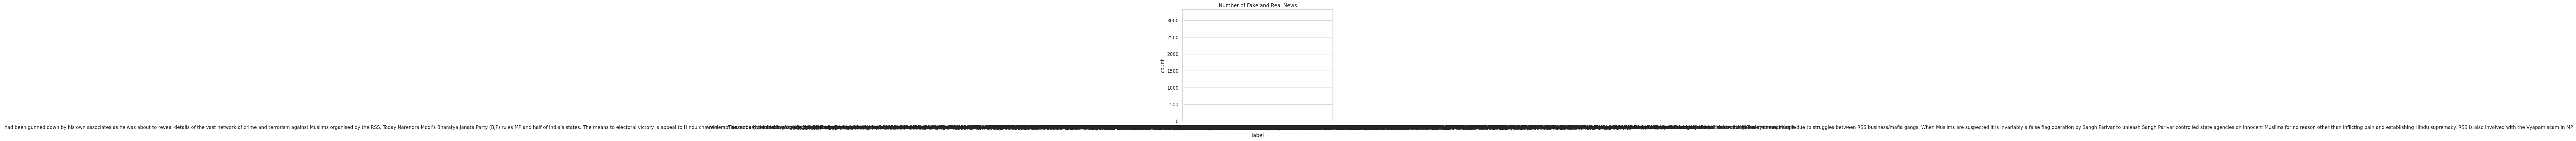

In [ ]:

# Assuming you have a DataFrame 'df' with a 'label' column containing 'fake' and 'real' values
sns.set(style="whitegrid")  # Optional: Set the style of the plot

# Define custom colors for 'fake' and 'real'
colors = ["red", "blue"]

# Create the count plot with custom colors
sns.countplot(x="label", data=df, palette=colors)

# Add a title to the plot
plt.title('Number of Fake and Real News')

# Show the plot
plt.show()


In [ ]:
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [ ]:
target=df.label.value_counts()
target

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [ ]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [ ]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')


Accuracy: 92.9%


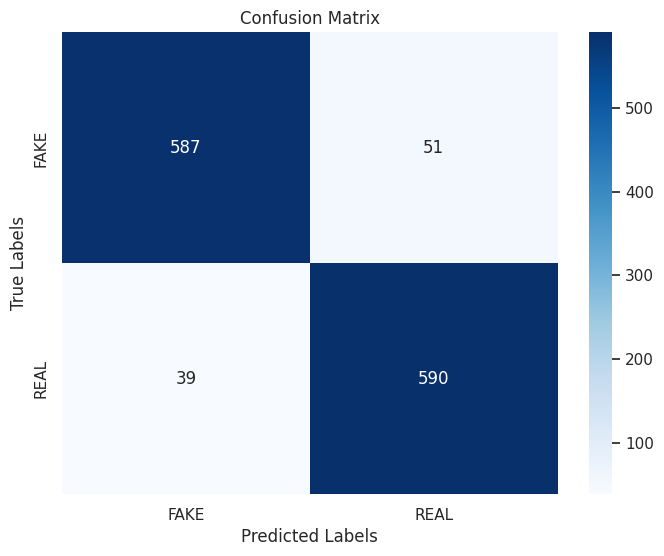

In [ ]:

# Calculate the confusion matrix
labels = ['FAKE', 'REAL']
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(tfidf_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(tfidf_test)

# Calculate accuracy
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print(f'Accuracy: {accuracy_percentage:.2f}%')

Accuracy: 90.61%


Cross-Validation Mean Accuracy: 90.13%


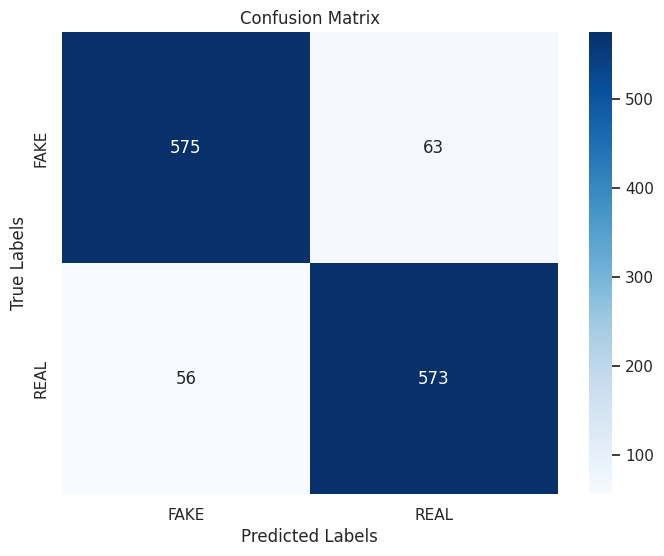

In [ ]:
# Cross-validation to assess model performance
cv_scores = cross_val_score(rf_classifier, tfidf_train, y_train, cv=5)
print(f'Cross-Validation Mean Accuracy: {round(np.mean(cv_scores) * 100, 2)}%')

# Calculate the confusion matrix
labels = ['FAKE', 'REAL']
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Initialize and train the Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(tfidf_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(tfidf_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 93.05%


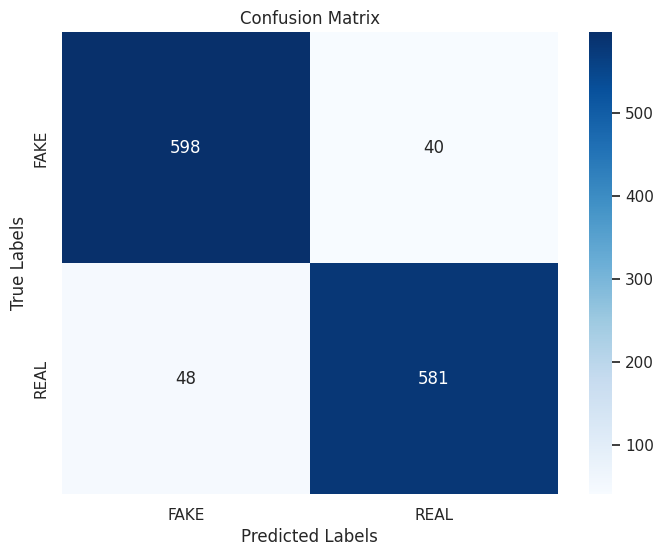

In [ ]:
# Calculate the confusion matrix
labels = ['FAKE', 'REAL']
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Initialize and train the Naive Bayes (Multinomial) classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(tfidf_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 84.06%


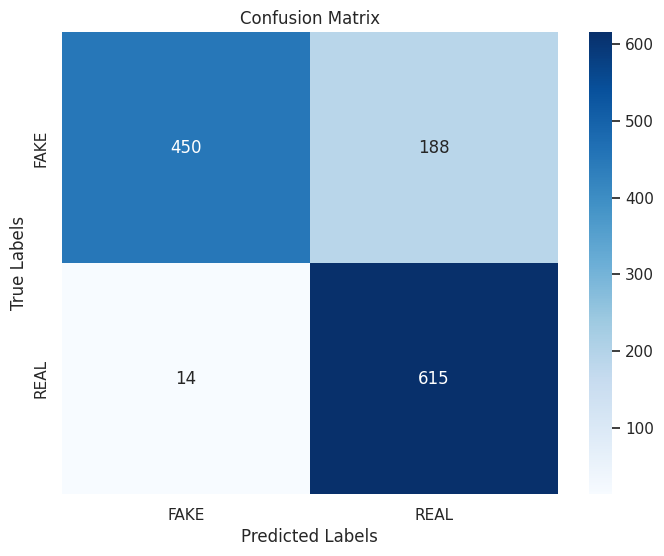

In [ ]:
#Calculate the confusion matrix
labels = ['FAKE', 'REAL']
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Load the dataset (replace 'fake_or_real_news.csv' with your actual file)
df = pd.read_csv('fake_or_real_news.csv')

# Assuming the DataFrame has 'text' and 'label' columns
# Perform data preprocessing (cleaning, tokenization, etc.)
# ...

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

# Initialize and train the Support Vector Machine (SVM) classifier
svm_classifier = SVC(class_weight='balanced', kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(tfidf_train, y_train)

# Function to preprocess input
def preprocess_input(text):
    cleaned_text = re.sub(r'http\S+', '', text)
    tokens = word_tokenize(cleaned_text)
    tokens_without_stopwords = [word for word in tokens if word.lower() not in stopwords.words('english')]
    lemmatized_tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens_without_stopwords]
    return ' '.join(lemmatized_tokens)

# Function to predict fake or real news from user input
def predict_user_input():
    user_input = input("Enter the news text: ")
    preprocessed_input = preprocess_input(user_input)
    input_tfidf = tfidf_vectorizer.transform([preprocessed_input])
    prediction = svm_classifier.predict(input_tfidf)
    result = 'FAKE' if prediction[0] == 'FAKE' else 'REAL'
    print(f'The prediction is: {result}')

# Evaluate the model on the test set
y_pred = svm_classifier.predict(tfidf_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)

# Predict fake or real news from user input
predict_user_input()


Accuracy on the test set: 93.29%
Confusion Matrix:
[[593  35]
 [ 50 589]]
Enter the news text: how women lead differently
The prediction is: FAKE
